# 収束性の解析
## 自己相関

In [1]:
using Distributions
using Plots
using StatsBase

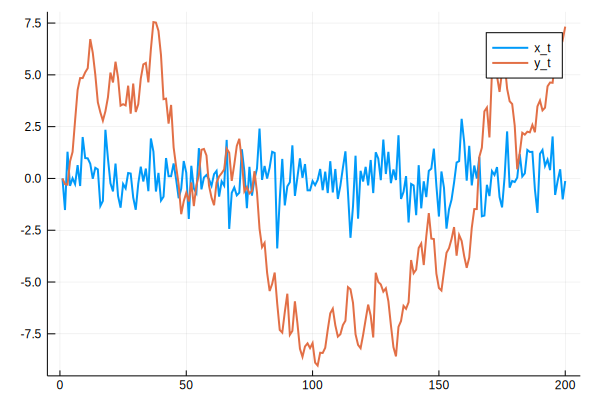

In [2]:
x_t = rand.(Normal(), 200)
x_t[1] = 0

y_t = zeros(200)
for i in 2:200
   y_t[i] = rand(Normal(y_t[i - 1], 1)) 
end

plot(x_t, linewidth = 2, label = "x_t")
plot!(y_t, linewidth = 2, label = "y_t")

In [3]:
function autocorrelation(x)
    result = autocov(x, 0:length(x)-1, demean = false)
    result ./= maximum(result)
    result
end

autocorrelation (generic function with 1 method)

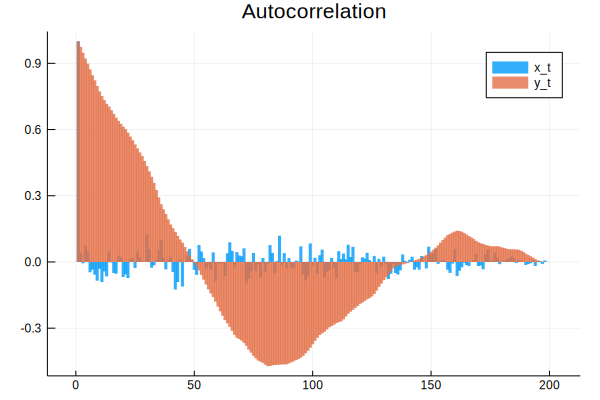

In [4]:
bar(autocorrelation(x_t), linewidth = 0, 
    fillalpha = 0.8, bar_width = 1.3, label = "x_t", title = "Autocorrelation")
bar!(autocorrelation(y_t), linewidth = 0, 
    fillalpha = 0.8, bar_width = 1.3, label = "y_t")

## 間引き処理

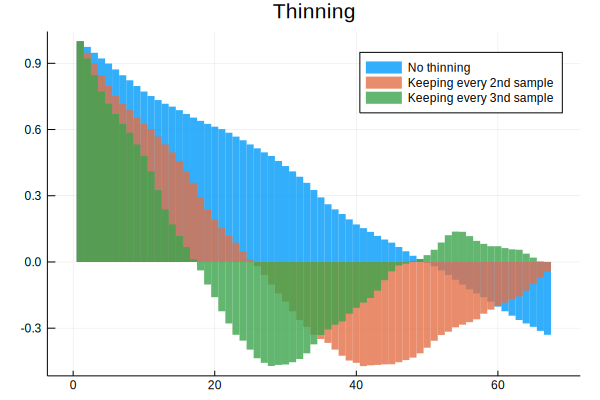

In [5]:
max_x = 200 ÷ 3 + 1
bar(autocorrelation(y_t)[1:max_x], linewidth = 0, 
    fillalpha = 0.8, bar_width = 1, label = "No thinning", title = "Thinning")
bar!(autocorrelation(y_t)[1:2:max_x*2], linewidth = 0, 
    fillalpha = 0.8, bar_width = 1, label = "Keeping every 2nd sample")
bar!(autocorrelation(y_t)[1:3:max_x*3], linewidth = 0, 
    fillalpha = 0.8, bar_width = 1, label = "Keeping every 3nd sample")